<a href="https://colab.research.google.com/github/satyakisen/Hands-On-ML-Notebooks/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome To the world of Classification.
In this notebook we are going to classify a handwritten image to its corresponding value. In tradition, this problem is known to all data scientist as the MNIST problems.<br>

Let us check the MNIST dataset in the scikit learn module.

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Let us explore some of these keys.

In [3]:
print(mnist['DESCR'])

X = mnist['data']
print(X.shape)

y= mnist['target']
print(y.shape)

X.head()

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X.iloc(0)[0].to_numpy()

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

Let us check now a sample data...

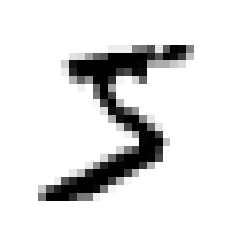

5


In [25]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def show_some_digit(some_digit):
  some_digit_image = some_digit.reshape(28,28)
  plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
  plt.axis('off')
  plt.show()

test_idx = 0
some_digit = X.to_numpy()[test_idx]
show_some_digit(some_digit)

print(y[test_idx])

Now we have checked the data, and have figured out the labels and the target. We would now like to do a train test split of the following data. Good News is that the MNIST data is already split and the first 60000 datas are set aside for training and the remaining are test datas.

In [20]:
X_train, X_test, y_train, y_test = X.iloc[:60000], X.iloc[60000:], y.iloc[:60000], y.iloc[60000:]

## Training a Binary Classifier

Let us now simplfy the problem and try to identify wether a digit is number 5 or not. Let us name it the `5-detector`. Let us build the test and train dataset.

In [21]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

y_test_5.value_counts()

False    9108
True      892
Name: class, dtype: int64

In [22]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

In [26]:
sgd_clf.predict([some_digit])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([ True])

## Performance Measure

In [32]:
# Implementing cross validation yourself...

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)

for train_idx, test_idx in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_fold = X_train.to_numpy()[train_idx]
  y_train_fold = y_train_5.to_numpy()[train_idx]
  X_test_fold = X_train.to_numpy()[test_idx]
  y_test_fold = y_train_5.to_numpy()[test_idx]

  clone_clf.fit(X_train_fold, y_train_fold)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct/len(y_pred))


0.9669
0.91625
0.96785


In [34]:
# Lets check the sklearn cross validation
from sklearn.model_selection import cross_val_score

score = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')
score

array([0.95035, 0.96035, 0.9604 ])

Wow! Above >93% accuracy (ratio of correct predictions) on all cross-validation folds? This looks amazing, doesn’t it? Well, before you get too excited, let’s look at a very dumb classifier that just classifies every single image in the “not-5” class:

In [36]:
from sklearn.base import BaseEstimator
import numpy as np
class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X),1), dtype=bool)

cross_val_score(Never5Classifier(), X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

This dummy classifier is also giving a score ~=90%. Thus we can say that finding accuracy is not a very good way to find a good model in case of classification especially when we are dealing with skewed data. Let us now explore. 

## Confusion Matrix
A much better way to evaluate the performance of a classifier is to look at the confu‐ sion matrix. The general idea is to count the number of times instances of class A are classified as class B. For example, to know the number of times the classifier confused images of 5s with 3s, you would look in the 5th row and 3rd column of the confusion matrix.

In [37]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)


array([ True, False, False, ...,  True, False, False])

In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

Each row in a confusion matrix represents an actual class, while each column repre‐ sents a predicted class. The first row of this matrix considers non-5 images (the nega‐ tive class): 53,892 of them were correctly classified as non-5s (they are called true negatives), while the remaining 687 were wrongly classified as 5s (false positives). The second row considers the images of 5s (the positive class): 1,891 were wrongly classified as non-5s (false negatives), while the remaining 3,530 were correctly classi‐ fied as 5s (true positives). A perfect classifier would have only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diago‐ nal (top left to bottom right):

In [39]:
# A perfect classifier would only have true positives and true negatives..
# For example

confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]])

The confusion matrix gives you a lot of information, but sometimes you may prefer a more concise metric. An interesting one to look at is the accuracy of the positive pre‐ dictions; this is called the precision of the classifier (Equation 3-1).<br>
Equation 3-1. Precision precision = TP / TP + FP <br>
TP is the number of true positives, and FP is the number of false positives.<br><br>
 A trivial way to have perfect precision is to make one single positive prediction and ensure it is correct (precision = 1/1 = 100%). This would not be very useful since the classifier would ignore all but one positive instance. So precision is typically used along with another metric named **recall**, also called sensitivity or true positive rate 
 Performance Measures(TPR): this is the ratio of positive instances that are correctly detected by the classifier (Equation 3-2).<br>
Equation 3-2. Recall recall = TP / TP + FN <br>
FN is of course the number of false negatives.

In [41]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311


It is often convenient to combine precision and recall into a single metric called the F1 score, in particular if you need a simple way to compare two classifiers. The F1 score is the harmonic mean of precision and recall (Equation 3-3). Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values. As a result, the classifier will only get a high F1 score if both recall and precision are high. <br>
Equation 3-3. F1 <br>
F1 = 2 / (1/precision)+(1/recall) = 2× (precision×recall)/(precision + recall) = TP / TP + (FN + FP)/2
   

In [42]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846